<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioperezA01793880/blob/main/visualizacion_DS_Julio_perez_AA01793880.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Materia: ciencia de datos
Nombre: Julio cesar perez zapata
Matrucula:  A01793880
Tutor: Maria de la Paz Rico

In [27]:
import pandas as pd  # se instalan las librerias necesarias para el ejercicio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [21]:
df = pd.read_csv(path)# 1. se carga el dataset y se muestra las primeras filas
col_names = ['ID', 'Amount_Credit', 'Gender', 'Education', 'Marital_status', 'Age', 'Repayment_status_September', 'Repayment_status_August', 
       'Repayment_status_July', 'Repayment_status_June', 'Repayment_status_May', 'Repayment_status_April','Amount_bill_statement_September_2005',
        'Amount_bill_statement_August_2005', 'Amount_bill_statement_July_2005', 'Amount_bill_statement_June_2005', 'Amount_bill_statement_May_2005',
        'Amount_bill_statement_April_2005','Amount_paid_September_2005', 'Amount_paid_August_2005', 'Amount_paid_July_2005', 'Amount_paid_June_2005', 
        'Amount_paid_May_2005','Amount_paid_April_2005', 'y']
df.columns = col_names
df.head()

,ID,Amount_Credit,Gender,Education,Marital_status,Age,Repayment_status_September,Repayment_status_August,Repayment_status_July,Repayment_status_June,...,Amount_bill_statement_June_2005,Amount_bill_statement_May_2005,Amount_bill_statement_April_2005,Amount_paid_September_2005,Amount_paid_August_2005,Amount_paid_July_2005,Amount_paid_June_2005,Amount_paid_May_2005,Amount_paid_April_2005,y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [8]:
df.shape # 2.Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

(30000, 25)

In [6]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [10]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [12]:
df.fillna(value = df.mean(), inplace = True)  #Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [13]:
df.isnull().any() # comprobamos que no haya dato nulo despues de la limpieza

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

In [14]:
# 4.Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


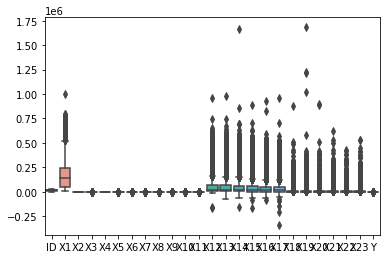

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(data=df)

5.Realiza el conteo de las variables categóricas
Son 9 variables categoricas en este dataset, los cuales son los siguientes:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [22]:
 #6. Escala los datos, si consideras necesario

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
variables_categoricas = [ 'Gender', 'Education', 'Marital_status', 'Repayment_status_September', 'Repayment_status_August', 
       'Repayment_status_July', 'Repayment_status_June', 'Repayment_status_May', 'Repayment_status_April']


variables_numericas = ['Amount_Credit', 'Age', 'Amount_bill_statement_September_2005',
        'Amount_bill_statement_August_2005', 'Amount_bill_statement_July_2005', 'Amount_bill_statement_June_2005', 'Amount_bill_statement_May_2005',
        'Amount_bill_statement_April_2005','Amount_paid_September_2005', 'Amount_paid_August_2005', 'Amount_paid_July_2005', 'Amount_paid_June_2005', 
        'Amount_paid_May_2005','Amount_paid_April_2005']


# para un mejor analicis es nesesario escalar la cantidad de pago que son valores siginificantes
# para ello se utilizara la tecnica de  MinMaxScaler con valores del 0-1

minMaxScaler = MinMaxScaler(feature_range=(0,1))
df_tranform = minMaxScaler.fit_transform(df[variables_numericas])
df_tranform = pd.DataFrame(df_tranform, columns=variables_numericas)
df_tranform = pd.concat([df[variables_categoricas],df_tranform,df['y']], axis=1)

df_tranform

,Gender,Education,Marital_status,Repayment_status_September,Repayment_status_August,Repayment_status_July,Repayment_status_June,Repayment_status_May,Repayment_status_April,Amount_Credit,...,Amount_bill_statement_June_2005,Amount_bill_statement_May_2005,Amount_bill_statement_April_2005,Amount_paid_September_2005,Amount_paid_August_2005,Amount_paid_July_2005,Amount_paid_June_2005,Amount_paid_May_2005,Amount_paid_April_2005,y
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.010101,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.111111,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040404,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.040404,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212121,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29996,1.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.141414,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29997,1.0,2.0,2.0,4.0,3.0,2.0,-1.0,0.0,0.0,0.020202,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29998,1.0,3.0,1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.070707,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


In [23]:
#7.Reduce las dimensiones con PCA, si consideras necesario. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70% Indica la importancia de las variables en cada componente

df1 = df.iloc[:,1:24]
df1

,Amount_Credit,Gender,Education,Marital_status,Age,Repayment_status_September,Repayment_status_August,Repayment_status_July,Repayment_status_June,Repayment_status_May,...,Amount_bill_statement_July_2005,Amount_bill_statement_June_2005,Amount_bill_statement_May_2005,Amount_bill_statement_April_2005,Amount_paid_September_2005,Amount_paid_August_2005,Amount_paid_July_2005,Amount_paid_June_2005,Amount_paid_May_2005,Amount_paid_April_2005
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [28]:


df_analisis = df_tranform[variables_numericas]  #Tomamos las variables numericas para realizar una reduccion
pcs = PCA() 
pcs.fit(preprocessing.scale(df_analisis.dropna(axis=0)))
PCA()
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })



In [29]:
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8411,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [30]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df_analisis.columns
                                )


pcsComponents_df.iloc[:,:6]  # a partir de los datos nos permite ver cuales variables correspondes
# a los componentes seleccionados, para ellos entre un mayor valor absoluto, la variable representa más al componente

,PC1,PC2,PC3,PC4,PC5,PC6
Amount_Credit,0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832
Age,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416
Amount_bill_statement_September_2005,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998
Amount_bill_statement_August_2005,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834
Amount_bill_statement_July_2005,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222
Amount_bill_statement_June_2005,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530
Amount_bill_statement_May_2005,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292
Amount_bill_statement_April_2005,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259
Amount_paid_September_2005,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580
Amount_paid_August_2005,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358


In [31]:
## Variables importantes en cada componente
print( " Max Variables  PC1 :" ) 
print( pcsComponents_df.PC1.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC2 :" ) 
print( pcsComponents_df.PC2.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC3 :" ) 
print( pcsComponents_df.PC3.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC4 :" ) 
print( pcsComponents_df.PC4.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC5 :" ) 
print( pcsComponents_df.PC5.nlargest(3))

 Max Variables  PC1 :
Amount_bill_statement_June_2005    0.391561
Amount_bill_statement_May_2005     0.388508
Amount_bill_statement_July_2005    0.388267
Name: PC1, dtype: float64
 

 Max Variables  PC2 :
Amount_paid_August_2005       0.408370
Amount_paid_July_2005         0.392302
Amount_paid_September_2005    0.383181
Name: PC2, dtype: float64
 

 Max Variables  PC3 :
Amount_paid_August_2005       0.201028
Amount_paid_September_2005    0.173883
Amount_paid_July_2005         0.122200
Name: PC3, dtype: float64
 

 Max Variables  PC4 :
Amount_paid_September_2005    0.362104
Amount_paid_August_2005       0.345707
Age                           0.339083
Name: PC4, dtype: float64
 

 Max Variables  PC5 :
Amount_paid_April_2005        0.659221
Amount_paid_September_2005    0.225630
Amount_paid_August_2005       0.148667
Name: PC5, dtype: float64


In [35]:
variables = [ 'Amount_Credit', 'Gender', 'Education', 'Marital_status', 'Age', 'Repayment_status_September', 'Repayment_status_August', 
       'Repayment_status_July', 'Repayment_status_June', 'Repayment_status_May', 'Repayment_status_April','Amount_bill_statement_September_2005',
        'Amount_bill_statement_August_2005', 'Amount_bill_statement_July_2005', 'Amount_bill_statement_June_2005', 'Amount_bill_statement_May_2005',
        'Amount_bill_statement_April_2005','Amount_paid_September_2005', 'Amount_paid_August_2005', 'Amount_paid_July_2005', 'Amount_paid_June_2005', 
        'Amount_paid_May_2005','Amount_paid_April_2005', 'y']

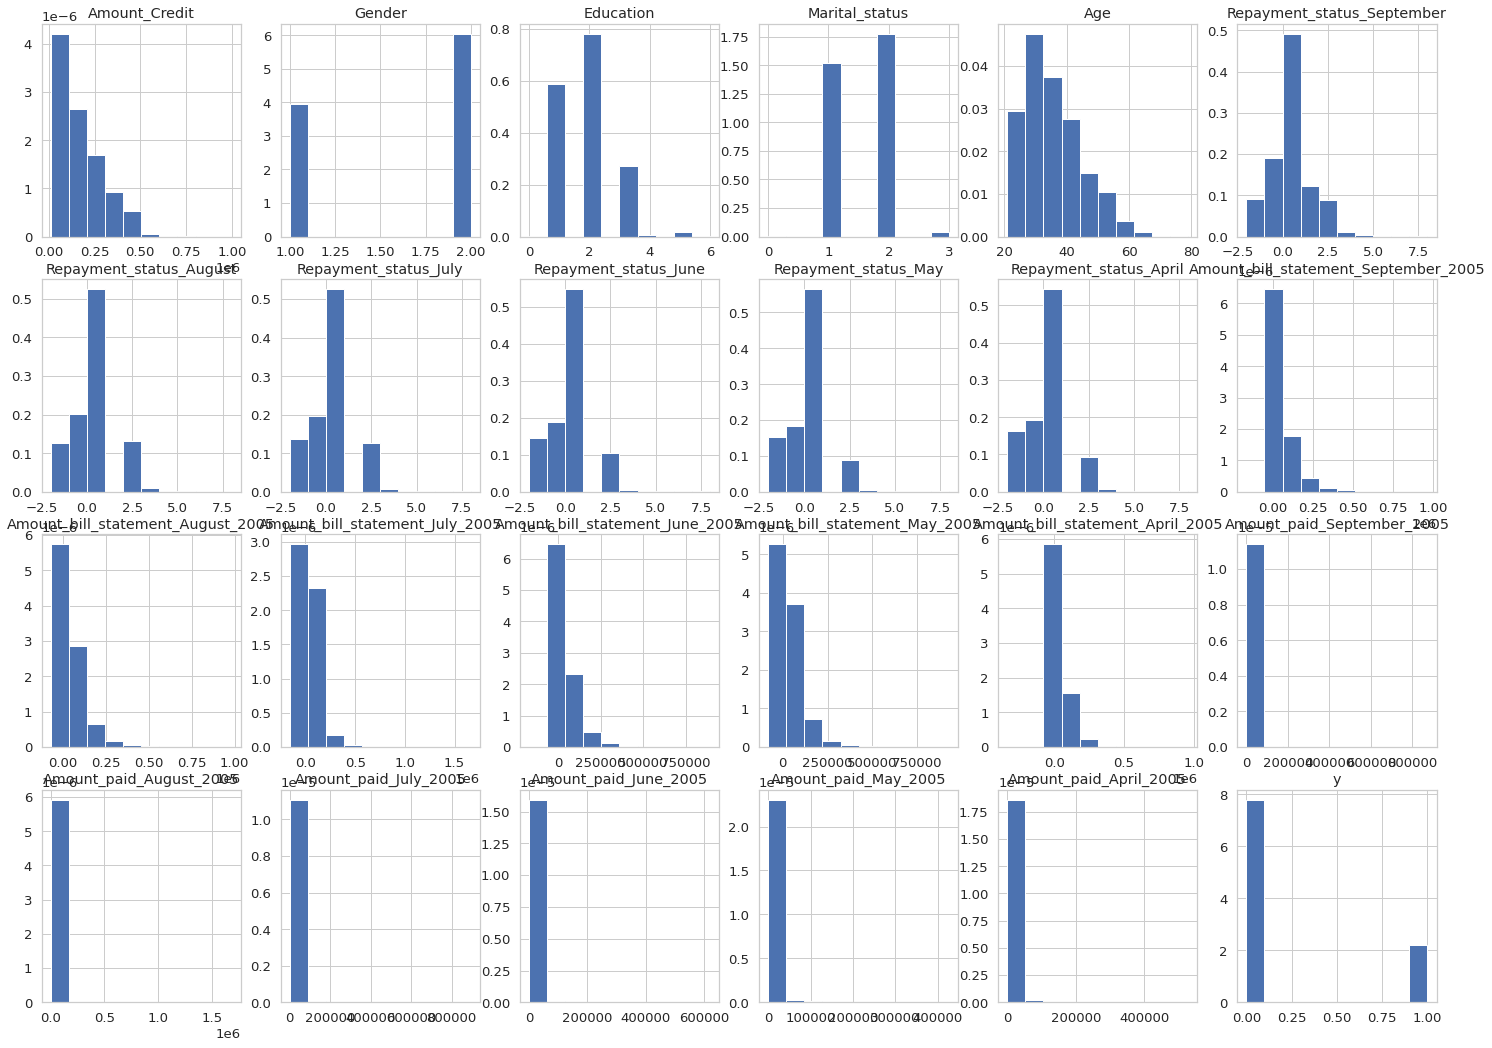

In [36]:
#8.Elabora los histogramas de los atributos para visualizar su distribución




fig, axs = plt.subplots(4, 6, figsize=(25, 18))

for i in range(0,6):
    plt.subplot(4, 6, i+1)
    plt.hist(df[variables[i]], density=True)
    plt.title(variables[i])
    
    plt.subplot(4, 6, i+7)
    plt.hist(df[variables[i+6]], density=True)
    plt.title(variables[i+6])
    
    plt.subplot(4, 6, i+13)
    plt.hist(df[variables[i+12]], density=True)
    plt.title(variables[i+12])
    
    plt.subplot(4, 6, i+19)
    plt.hist(df[variables[i+18]], density=True)
    plt.title(variables[i+18])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


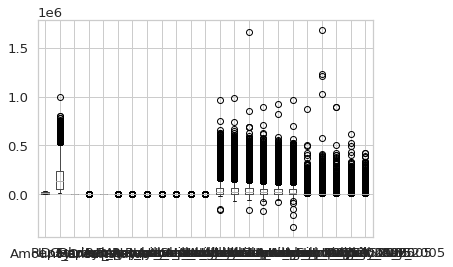

In [41]:
# 9 Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

df.iloc[:,0:23].boxplot()

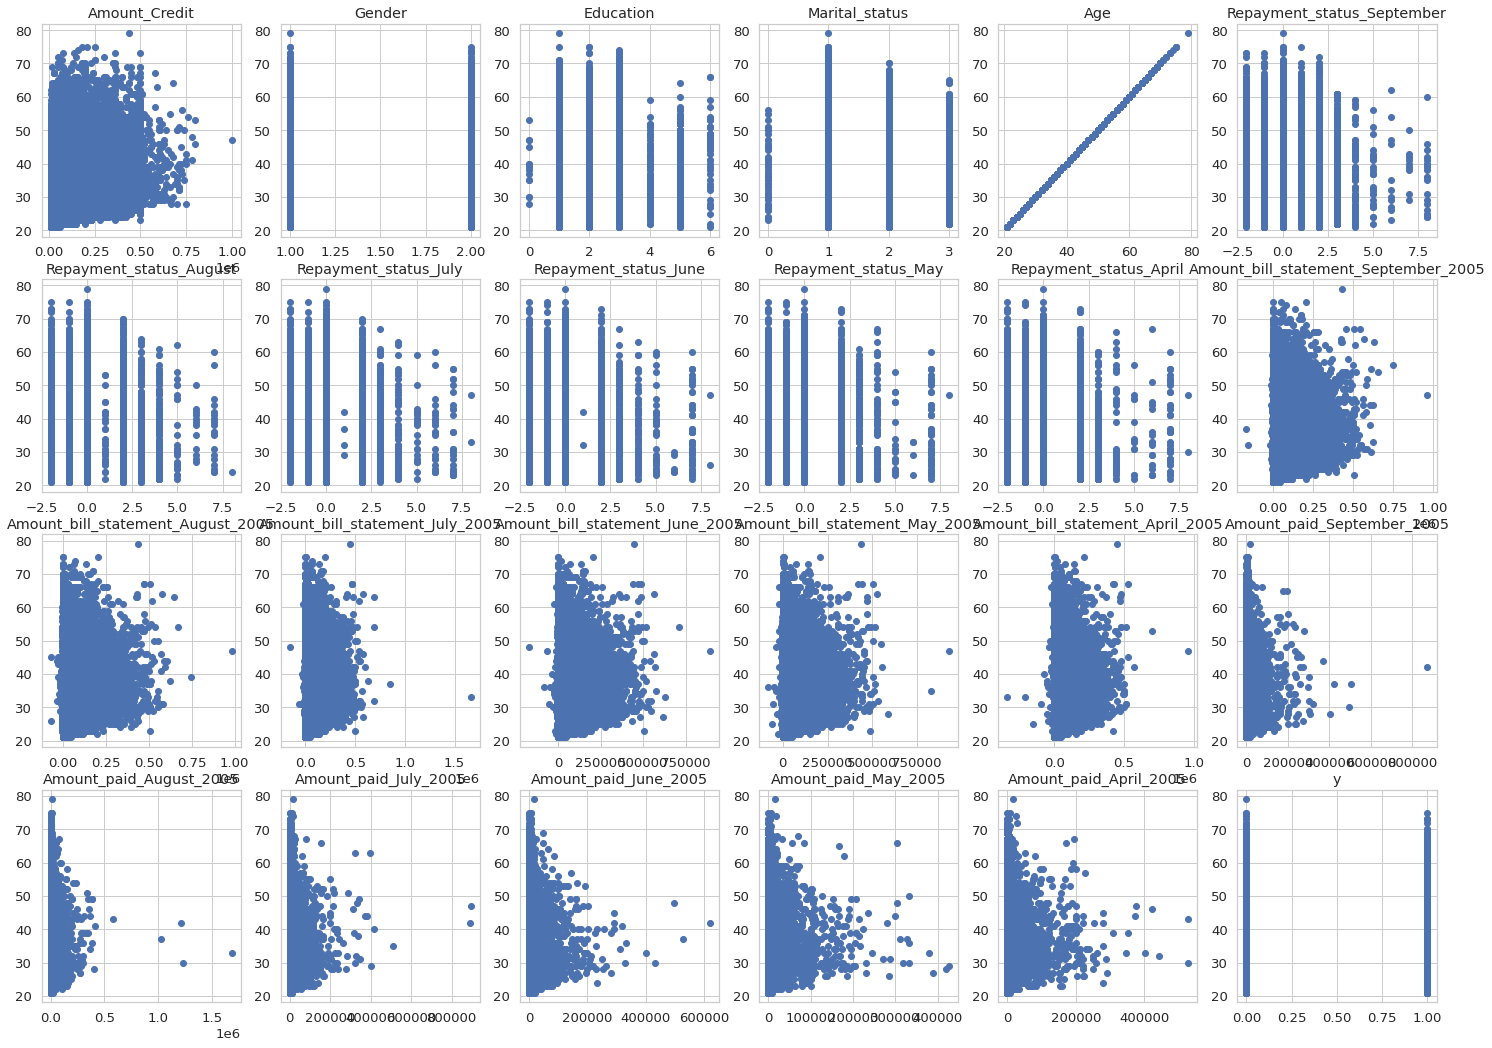

In [40]:
fig, axs = plt.subplots(4, 6, figsize=(25, 18))

for i in range(0,6):
    plt.subplot(4, 6, i+1)
    plt.scatter(df[variables[i]], df['Age'])
    plt.title(variables[i])
    
    plt.subplot(4, 6, i+7)
    plt.scatter(df[variables[i+6]], df['Age'])
    plt.title(variables[i+6])
    
    plt.subplot(4, 6, i+13)
    plt.scatter(df[variables[i+12]], df['Age'])
    plt.title(variables[i+12])
    
    plt.subplot(4, 6, i+19)
    plt.scatter(df[variables[i+18]], df['Age'])
    plt.title(variables[i+18])